In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import datetime as dt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/MLDatasets/Future Sales/sales_train.csv', parse_dates=['date'])
items = pd.read_csv('/content/drive/MyDrive/MLDatasets/Future Sales/items.csv')
shops = pd.read_csv('/content/drive/MyDrive/MLDatasets/Future Sales/shops.csv')
item_cat = pd.read_csv('/content/drive/MyDrive/MLDatasets/Future Sales/item_categories.csv')

test = pd.read_csv('/content/drive/MyDrive/MLDatasets/Future Sales/test.csv')

In [ ]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
sales['date'].dtype

dtype('<M8[ns]')

In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
training_data = sales.join(items, on = 'item_id', rsuffix='@').join(shops, on = 'shop_id', rsuffix='@').join(item_cat, on = 'item_category_id', rsuffix='@')

In [ ]:
training_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_id@,item_category_id,shop_name,shop_id@,item_category_name,item_category_id@
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,"Ярославль ТЦ ""Альтаир""",59,Кино - Blu-Ray,37
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,"Москва ТРК ""Атриум""",25,Музыка - CD фирменного производства,56


In [ ]:
training_data = training_data.drop(['item_id@', 'shop_id@', 'item_category_id@'], axis=1)

In [ ]:
training_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [ ]:
training_data['date'] = pd.to_datetime(training_data['date'], format = '%d.%M.%Y')
training_data['day'] = training_data['date'].dt.day
training_data['month'] = training_data['date'].dt.month
training_data['year'] = training_data['date'].dt.year

training_data = training_data.drop(['date'], axis=1)

training_data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,day,month,year
0,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,1,2,2013
1,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1,3,2013
2,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1,5,2013
3,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,1,6,2013
4,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,15,1,2013


In [ ]:
monthly_sales = training_data[['date_block_num', 'shop_id','item_id','item_price', 'item_cnt_day', 'item_category_id', 'month', 'year']].groupby(['date_block_num', 'shop_id', 'item_id', 'item_category_id']).agg({'item_price':'mean', 'item_cnt_day':'sum', 'month':'min', 'year':'min'}).reset_index()

In [ ]:
monthly_sales.shape

(1609124, 8)

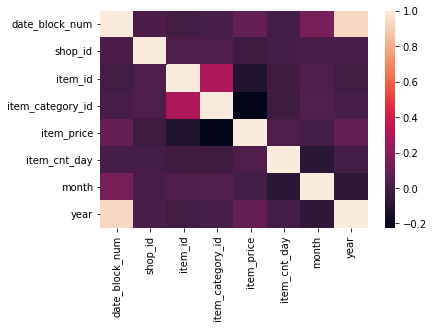

In [ ]:
sns.heatmap(monthly_sales.corr())

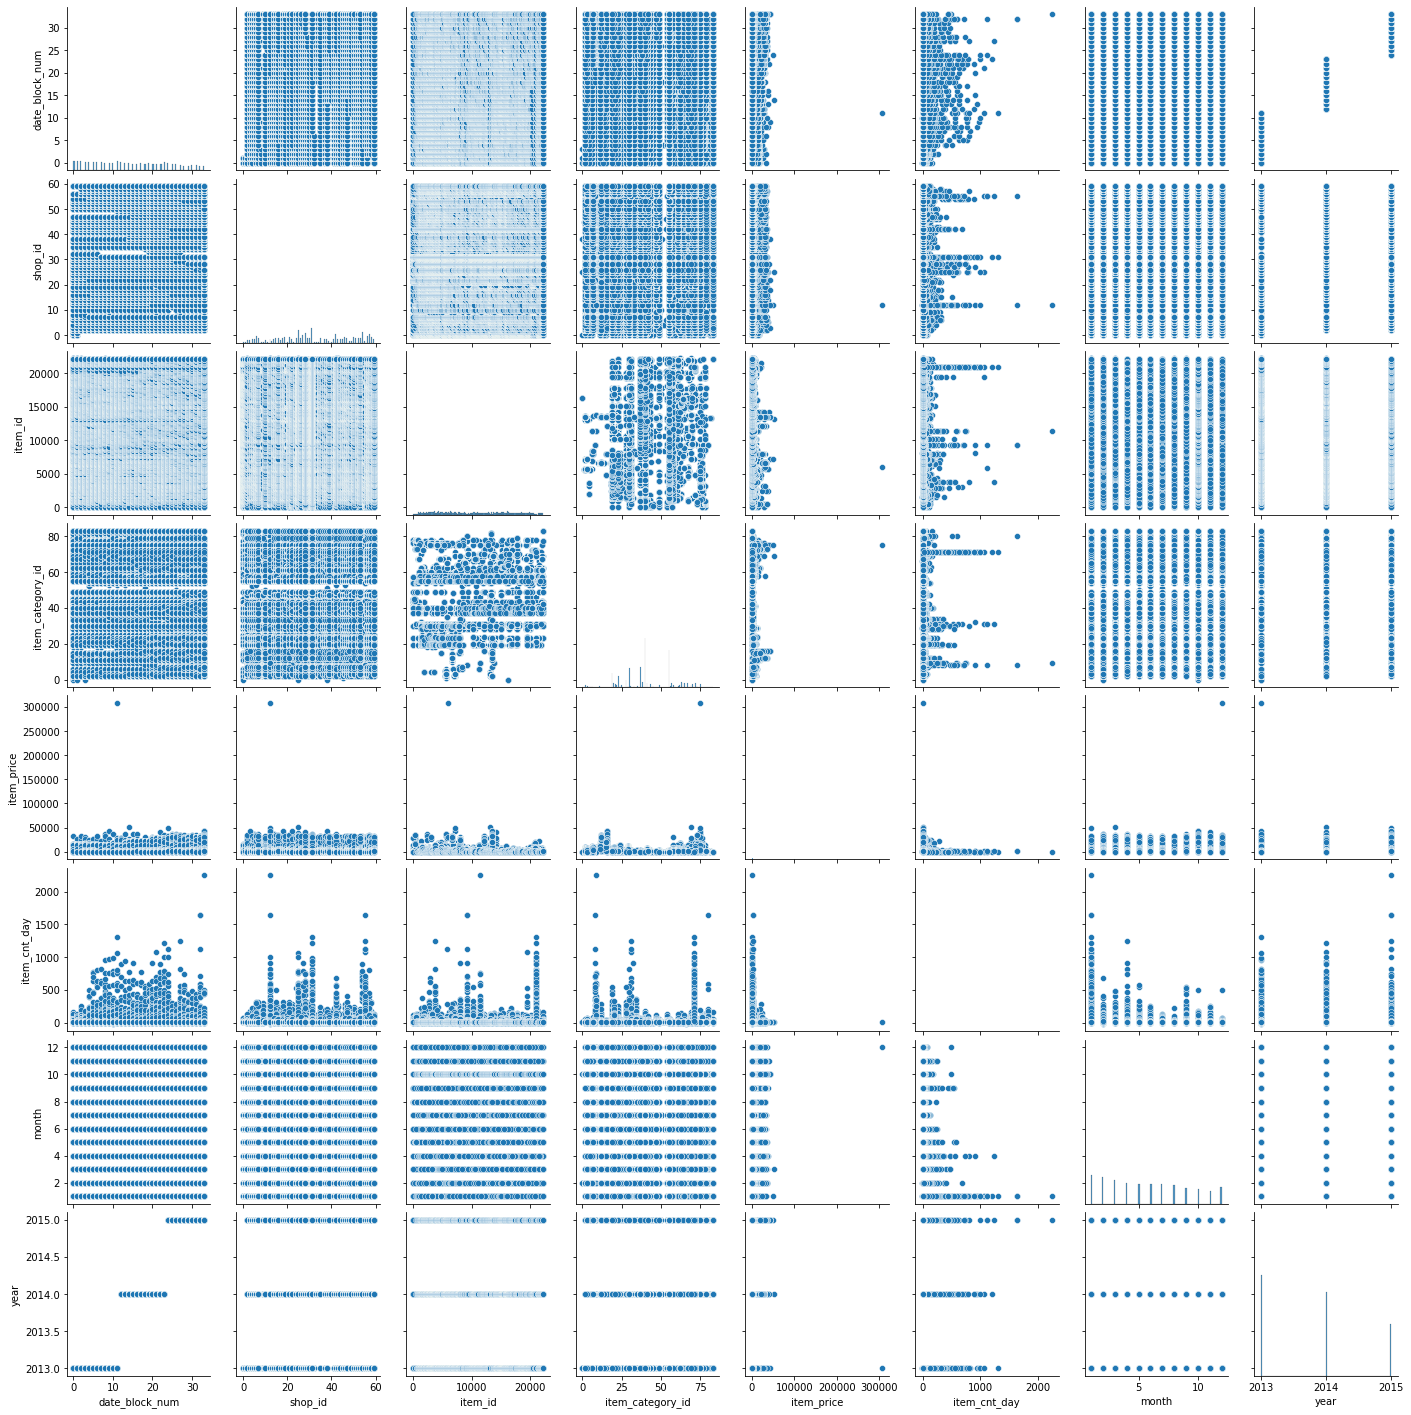

In [ ]:
sns.pairplot(monthly_sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


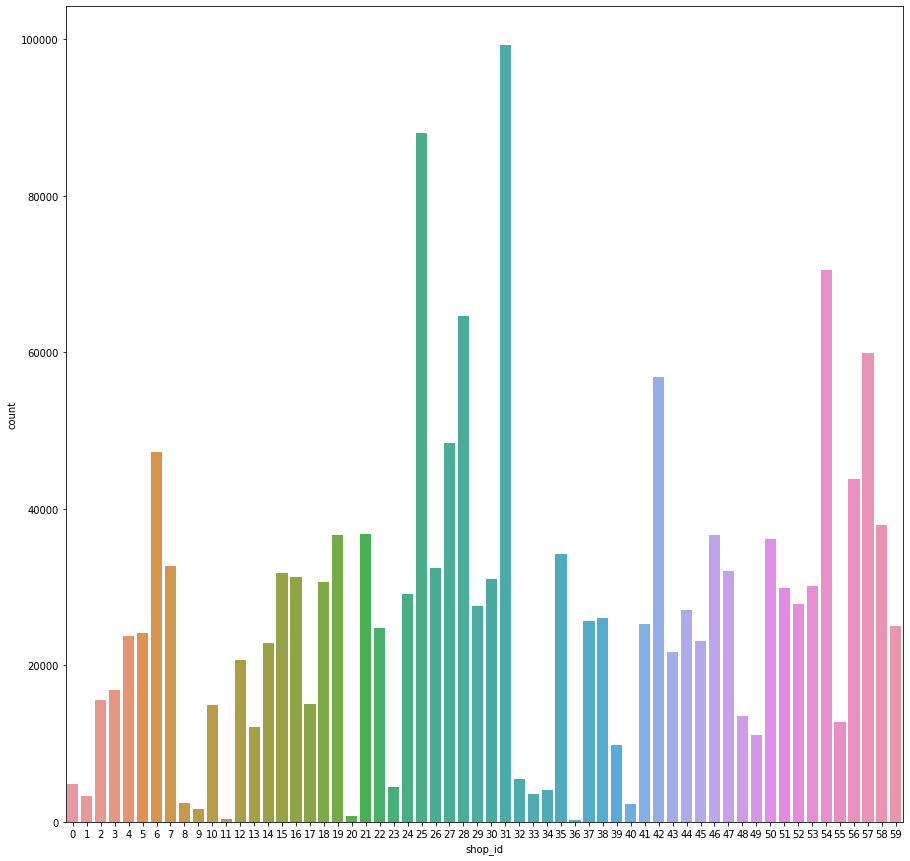

In [ ]:
rcParams['figure.figsize'] = 15,15
sns.countplot(monthly_sales['shop_id'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


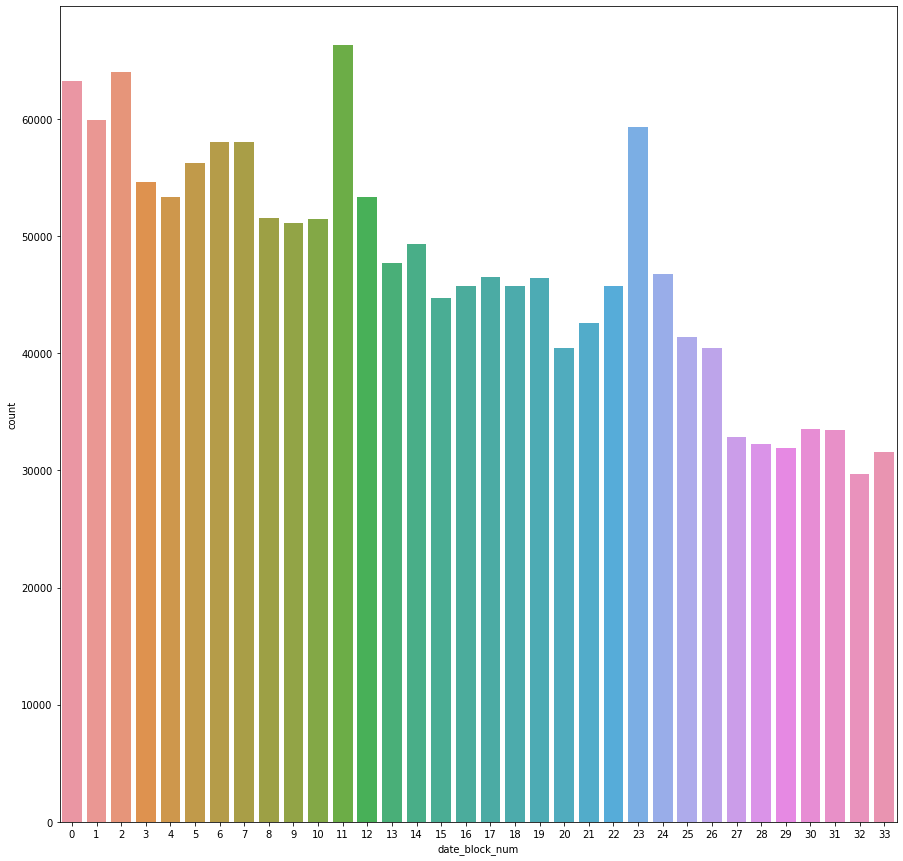

In [ ]:
sns.countplot(monthly_sales['date_block_num'])

In [ ]:
training_data.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
day                   0
month                 0
year                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


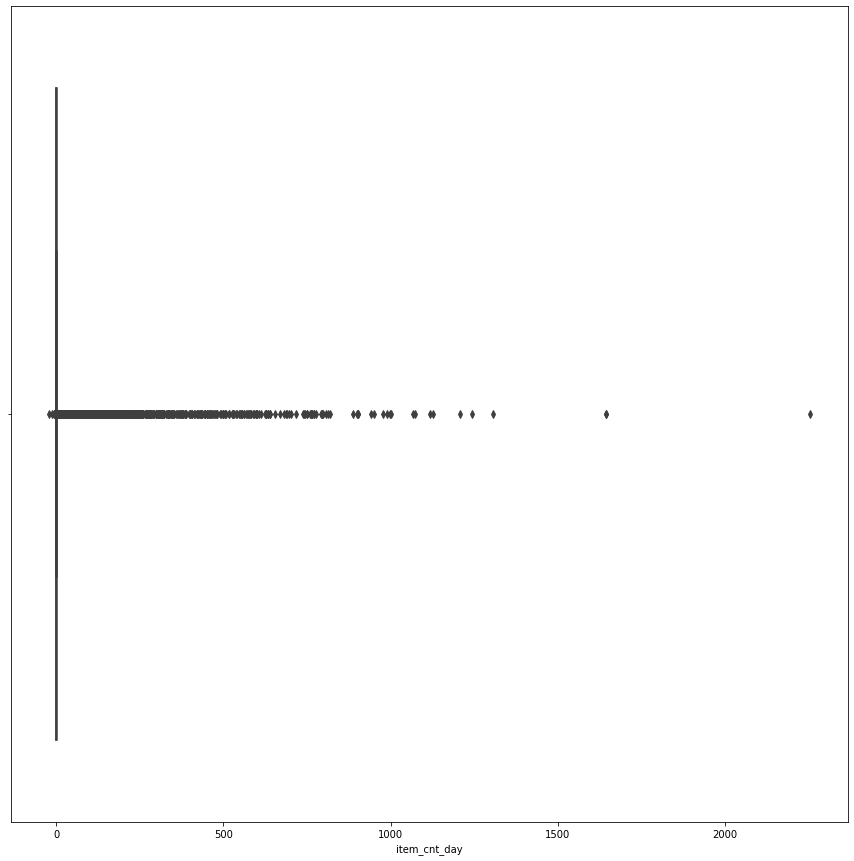

In [ ]:
sns.boxplot(monthly_sales['item_cnt_day'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


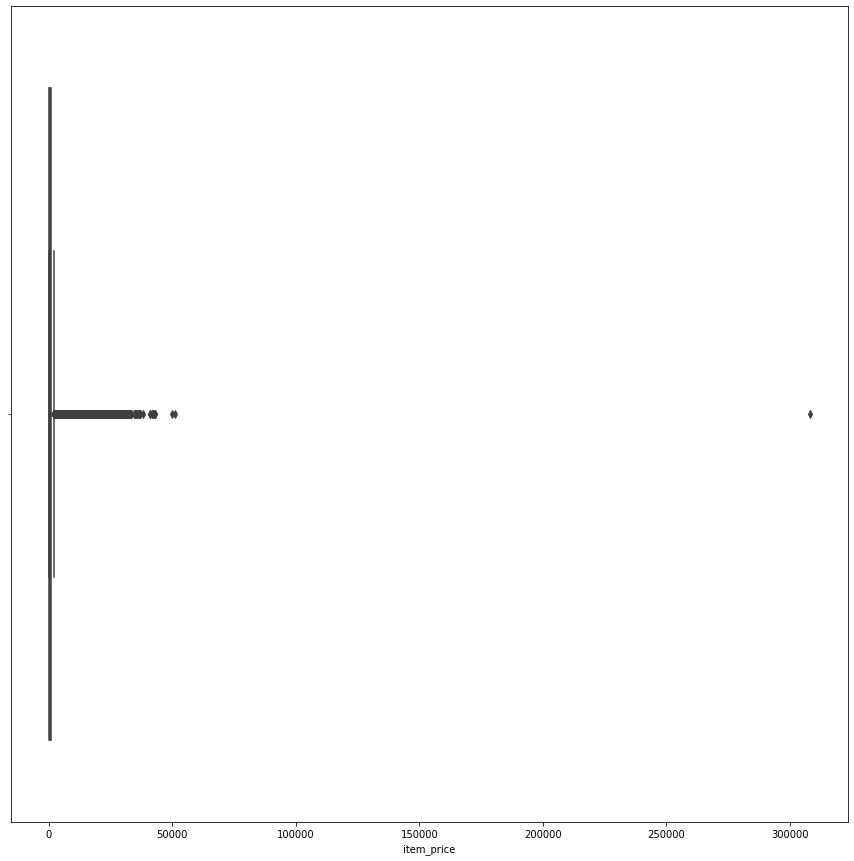

In [ ]:
sns.boxplot(monthly_sales['item_price'])

In [ ]:
monthly_sales = monthly_sales[monthly_sales['item_cnt_day']>0]
monthly_sales = monthly_sales[monthly_sales['item_cnt_day']<1400]
monthly_sales = monthly_sales[monthly_sales['item_price']<100000]

In [ ]:
shop_mean = monthly_sales.groupby(['shop_id']).agg({'item_cnt_day':['mean']})
shop_mean.columns = ['shop_mean']
shop_mean.reset_index(inplace=True)

In [ ]:
item_mean = monthly_sales.groupby(['item_id']).agg({'item_cnt_day':['mean']})
item_mean.columns = ['item_mean']
item_mean.reset_index(inplace=True)

In [ ]:
shop_item_mean = monthly_sales.groupby(['shop_id','item_id']).agg({'item_cnt_day':['mean']})
shop_item_mean.columns = ['shop_item_mean']
shop_item_mean.reset_index(inplace=True)

In [ ]:
month_mean = monthly_sales.groupby(['month']).agg({'item_cnt_day':['mean']})
month_mean.columns = ['month_mean']
month_mean.reset_index(inplace=True)

In [ ]:
year_mean = monthly_sales.groupby(['year']).agg({'item_cnt_day':['mean']})
year_mean.columns = ['year_mean']
year_mean.reset_index(inplace=True)

In [ ]:
monthly_sales = pd.merge(monthly_sales, shop_mean, on=['shop_id'], how='left')
monthly_sales = pd.merge(monthly_sales, item_mean, on=['item_id'], how='left')
monthly_sales = pd.merge(monthly_sales, shop_item_mean, on=['shop_id','item_id'], how='left')
monthly_sales = pd.merge(monthly_sales, month_mean, on=['month'], how='left')
monthly_sales = pd.merge(monthly_sales, year_mean, on=['year'], how='left')

In [ ]:
monthly_sales.head()

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,month,year,shop_mean,item_mean,shop_item_mean,month_mean,year_mean
0,0,0,32,40,221.0,6.0,1,2013,2.42792,2.668367,8.0,4.478128,2.277733
1,0,0,33,37,347.0,3.0,1,2013,2.42792,1.492857,3.0,4.478128,2.277733
2,0,0,35,40,247.0,1.0,1,2013,2.42792,2.960000,7.5,4.478128,2.277733
3,0,0,43,40,221.0,1.0,1,2013,2.42792,1.000000,1.0,4.478128,2.277733
4,0,0,51,57,128.5,2.0,1,2013,2.42792,1.404762,2.5,4.478128,2.277733


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
test_shops = test['shop_id'].unique()
test_items = test['item_id'].unique()
training_test = monthly_sales[monthly_sales['shop_id'].isin(test_shops)]
training_test = monthly_sales[monthly_sales['item_id'].isin(test_items)]

In [ ]:
training_test.head()

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,month,year,shop_mean,item_mean,shop_item_mean,month_mean,year_mean
0,0,0,32,40,221.0,6.0,1,2013,2.42792,2.668367,8.0,4.478128,2.277733
1,0,0,33,37,347.0,3.0,1,2013,2.42792,1.492857,3.0,4.478128,2.277733
4,0,0,51,57,128.5,2.0,1,2013,2.42792,1.404762,2.5,4.478128,2.277733
7,0,0,88,40,76.0,1.0,1,2013,2.42792,1.000000,1.0,4.478128,2.277733
12,0,0,149,45,99.0,3.0,1,2013,2.42792,1.330827,3.0,4.478128,2.277733


In [ ]:
training_test.shape

(703065, 13)

In [ ]:
X = training_test.drop('item_cnt_day', axis=1)
y = training_test['item_cnt_day']

In [ ]:
X.head()

,date_block_num,shop_id,item_id,item_category_id,item_price,month,year,shop_mean,item_mean,shop_item_mean,month_mean,year_mean
0,0,0,32,40,221.0,1,2013,2.42792,2.668367,8.0,4.478128,2.277733
1,0,0,33,37,347.0,1,2013,2.42792,1.492857,3.0,4.478128,2.277733
4,0,0,51,57,128.5,1,2013,2.42792,1.404762,2.5,4.478128,2.277733
7,0,0,88,40,76.0,1,2013,2.42792,1.000000,1.0,4.478128,2.277733
12,0,0,149,45,99.0,1,2013,2.42792,1.330827,3.0,4.478128,2.277733


In [ ]:
y.head()

0     6.0
1     3.0
4     2.0
7     1.0
12    3.0
Name: item_cnt_day, dtype: float64

In [ ]:
X_scaled = StandardScaler().fit(X).transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
score = lin_reg.score(x_test,y_test)
print(score)

0.7532913445416037


In [ ]:
lin_reg.intercept_

2.7402253607812894

In [ ]:
coeff = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
date_block_num,0.904211
shop_id,-0.000778
item_id,0.025762
item_category_id,-0.004760
item_price,0.028642
month,-0.220835
year,-1.343979
shop_mean,-0.018822
item_mean,0.065800
shop_item_mean,9.118584


In [ ]:
pred = lin_reg.predict(x_test)

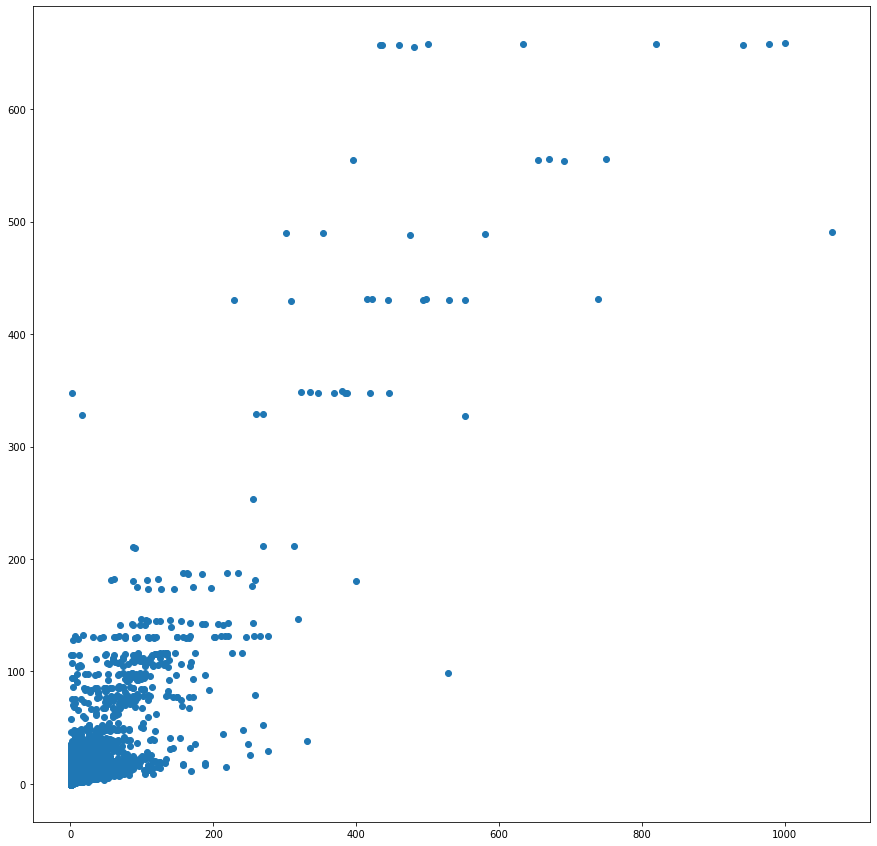

In [ ]:
plt.scatter(y_test, pred)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
score = rfr.score(x_test, y_test)
print(score)

0.8815479688631487


In [ ]:
newsales_train = training_test.pivot_table(index= ['shop_id', 'item_id'], columns = 'date_block_num', values = 'item_cnt_day', fill_value = 0).reset_index()
newsales_train = pd.merge(test,newsales_train,on = ['shop_id', 'item_id'],how = 'left')
newsales_train.fillna(0, inplace = True)
newsales_train.head()

,ID_x,shop_id,item_id,ID_y,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
newsales_train.shape

(214200, 38)

In [ ]:
X_train = newsales_train.drop(33, axis=1)
y_train1 = newsales_train[32]
X_test = newsales_train.drop(0, axis=1)
y_test1 = newsales_train[33]

In [ ]:
print(X_train.shape)
print(y_train1.shape)
print(X_test.shape)
print(y_test1.shape)

(214200, 37)
(214200,)
(214200, 37)
(214200,)


In [ ]:
rfr1 = RandomForestRegressor(n_estimators = 135, max_depth=20, random_state=42, n_jobs= 16, criterion='mse')
rfr1.fit(X_train, y_train1)
y_pred_train = rfr1.predict(X_train)
y_pred_test = rfr1.predict(X_test)
r2_train_lr = r2_score(y_train1, y_pred_train)
print(r2_train_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9949989146705334


In [ ]:
submission = pd.DataFrame({'ID':X_test.index,'item_cnt_month':rfr1.predict(X_test)})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
submission.to_csv('submission.csv', index=False)